# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [151]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# to supress warnings
import warnings
warnings.filterwarnings("ignore")

In [153]:
# pandas display - set the maximum number of columns
pd.set_option("display.max_columns", None)
# set the maximum number of rows
pd.set_option("display.max_rows", 200)

# set the precision of floating numbers to 5 decimal places
pd.set_option("display.float_format",lambda x: "%.5f" % x)

In [154]:
#imports to tune the model, get diffrenet metric scores and split data
from sklearn.metrics import (

    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score

# for data scaling and hot encoding
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

#To impute missing values
from sklearn.impute import SimpleImputer

#To help with model building
from sklearn.linear_model import LogisticRegression

# building classificationmodels
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV



In [155]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

**Loading the data**

In [156]:
#import the data
df = pd.read_csv("ExtraaLearn.csv")

In [157]:
# we can also use data.shape to see the number pf rows and columns
#the first number shows rows, and the second one columns (4612 rows and 15 columns)
df.shape

(4612, 15)

Our data set has  4612 rows and 15 columns

## Data Overview

- Observations
- Sanity checks

In [158]:
#we don't want to overwrite the original data frame
data = df.copy()



In [159]:
# obesrving our data set 
data.head()
# by default it will display the first 5 and the last 5 rows

#let's inspect the data that we have



,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [160]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


MY OBSERVATION ABOUT THE DATA SET:

We have age of the lead and their current occupation 
#are they employed, unemployed or students

We have whether the lead interacted with ExtraLearn either through the web or mobile app -
this an help us see which one has more leads, the website or the mobile app

Profile completed shows if the lead completed their profile or not.
This could help us see whether completed profiles are the ones that buy or not
this is in percentages

We are also able to see how many times the lead visited the website

We also have information on the total time that a lead spent on the website
this is recorded in secs

When they visited our website, what was the average number of pages on the website did they view

We also have information that shows the last interaction between the lead and extra learn,
Was it through an email that they received about the program?
Did they have a phone conversation with a representative through sms?
Was it through the website? - Did they have a live chat on the website

Did the lead see the ad of ExtraaLearn in the newspaper?

Did the lead see the ad of ExtraaLearn in the magazine?

Did the lead see the ad of ExtraaLearn on a digital platform?

Did the lead hear about ExtraaLearn on an education channel
was it an online forum, or education wesite etc?

Did the lead hear about ExtraaLearn through a referral?

Did the lead eventually become a paying customer or not
**We want to see how many are paying customers out of the total**

In [161]:
# checking the data types of the columns and checkngfor missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

we do not have any null values

In [162]:
# checking if there are any duplicates is to use the below code:
data.duplicated().sum()


0

We do not have any duplicated data

In [163]:
# checking % of nulls. ive me the total number of nulls divided by the total count  and times 100 (this gives me the percentage)
round(data.isnull().sum() / data.isnull().count() * 100, 2)

ID                      0.00000
age                     0.00000
current_occupation      0.00000
first_interaction       0.00000
profile_completed       0.00000
website_visits          0.00000
time_spent_on_website   0.00000
page_views_per_visit    0.00000
last_activity           0.00000
print_media_type1       0.00000
print_media_type2       0.00000
digital_media           0.00000
educational_channels    0.00000
referral                0.00000
status                  0.00000
dtype: float64

we do not have any nulls

In [164]:
# let's find out how many unique values exist using the ID
data['ID'].nunique()
data.sample(10)
#it seems all our IDs start with EXT

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4322,EXT4323,32,Professional,Mobile App,High,1,1950,0.19700,Phone Activity,No,No,Yes,Yes,No,0
4234,EXT4235,31,Professional,Mobile App,Medium,2,1523,2.74000,Phone Activity,No,Yes,No,No,No,0
2394,EXT2395,49,Professional,Website,Medium,5,44,2.20700,Phone Activity,No,No,Yes,No,No,0
2794,EXT2795,44,Professional,Website,High,10,83,4.25600,Website Activity,No,No,No,No,No,1
2685,EXT2686,59,Professional,Mobile App,High,5,617,2.16900,Email Activity,No,No,No,No,No,0
2025,EXT2026,60,Unemployed,Website,Medium,3,213,2.23400,Website Activity,No,No,No,Yes,No,0
1904,EXT1905,57,Professional,Mobile App,High,3,358,2.09700,Email Activity,No,No,No,No,No,0
522,EXT523,19,Student,Website,Medium,7,280,3.46600,Phone Activity,Yes,No,Yes,No,No,0
2899,EXT2900,51,Professional,Website,High,0,0,0.00000,Email Activity,No,No,No,No,Yes,1
2521,EXT2522,45,Unemployed,Mobile App,Medium,6,63,3.67200,Website Activity,No,No,No,No,No,0


We have 4612 unique IDs, which match with the  4612 rows that we have (the shape of the dataset). 

This shows that every ID in the data field is unique

data.sample(10) shows that our IDs all start with EXT followed by numbers. The number seem to be incremental

Our dataset shows  no duplicates as it shows False

All of the values are not null values

We have 4612 rows, which shows that there are no missing values

Our data type shows that we have: 

1 float ( page_views_per_visit)

4 int types (age, website_visits, time_spent_on_website,status                 )

and 10 string types - mostly strings are treated as object variables

The total size of the data set is 540 kb which is rather a small data set


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**UNIVARIATE ANALYSIS - NUMERICAL FEATURES**

In [165]:
#let's look at the descriptive statistics for out continuous data set
# pandas treats integers and floats as continuous variables- hence it will shows us 5 values which are integers and floats
data.describe().T
#this will show us the minumum,maximum,quartile,median,std

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


#### **Observations:**
* **Age:** On average our leads are aged 46. The minimum age is 18 and the highest age is 63
* **Website visits:** on average the customer visited the website about 4 times. The lowest time is 0 and the maximum time a lead has visited the website is 30 times
* **Time spent on website:** The lowest time spent on the website is 0 and the highest total time spent is 2537 seconds.






3- TIME SPENT ON WEBSITE: 

The average total time spend on the website by a customer is 724 seconds which is 12 mins


The lowest time spent on the website is 0 and the highest total time spent is 2537


4- PAGE VIEW PER VISIT - Average number of pages on the website viewed during the visits

On average a customer views 3 pages during a visit.

The least viewed number of pages is 0 meaning that the lead sometimes opens the site but does not view any page

The most viewed number of pages is 18

5- STATUS -  Flag indicating whether the lead was converted to a paid customer or not

On average, a lead converting to a customer has been very low, 0 and the maximum has been 1 client

this means leads that convert to buying customers are very few

**UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES**

In [166]:
data.describe(include=["object"]).T


,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [167]:
# Printing the % sub categories of each category

for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in ID are :
ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
**************************************************
Unique values in current_occupation are :
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
**************************************************
Unique values in first_interaction are :
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
**************************************************
Unique values in profile_completed are :
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
**************************************************
Unique values in last_activity are :
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
*****************************

**Observations:**
* Most of the leads are professionals followed by the umemployed. There is a big margin on the difference between the unemployed and students. Very few students are leads
* Most of the profiles are above 50 -100 % completed. Only a few leads have  profiles that are 0 -50% completed. It seems most people do complete their profiles
* Most leads had their first interaction with ExtraaLearn through a website. However, there is not much of a margin from those who first interacted through mobile
* Most leads that eventually buy  received more information about ExtraLearn through email.Website activity did not convert much but its still a good number of people
* Only 497 out of 4612 leads,saw the ad of ExtraaLearn in the Newspaper, which means advertising on newspaper is propbaly not that beneficial compared to other means
* Only 233 leads saw the ad of ExtraaLearn in the Magazine
* Only 527 leads saw the ad of ExtraaLearn on the digital platforms
* Only 705 leads heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* Only 93 leads  heard about ExtraaLearn through reference.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [168]:
# we are dropping the ID because we will not use it
data.drop(["ID"], axis=1, inplace=True)

In [169]:
data["print_media_type1"].replace("No", 0, inplace=True)
data["print_media_type1"].replace("Yes", 1, inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### **Univariate analysis**

**1.Age:**

In [170]:
# boxplots
# create a function called histogram_boxplot that takes our data frame
def histogram_boxplot(data,feature,figsize=(12,7),kde=True,bins = None):
    #create the plot so that they are uniform using matpltlib
    figure, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize = figsize)
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color= 'violet')
    # we have created a box plot 
    # now lets create a histogram
    if bins == None:
      sns.histplot(data = data, x = feature,kde = kde,ax = ax_hist)
    else:
        sns.histplot(data = data, x = feature,kde = kde,ax = ax_hist, bins = bins)
        # it would be nice to see the mean and median too on the histogram
        ax_hist.axvline(data[feature].mean(),color = 'green',linestyle = '--')
        ax_hist.axvline(data[feature].median(),color ='black',linestyle ='--')

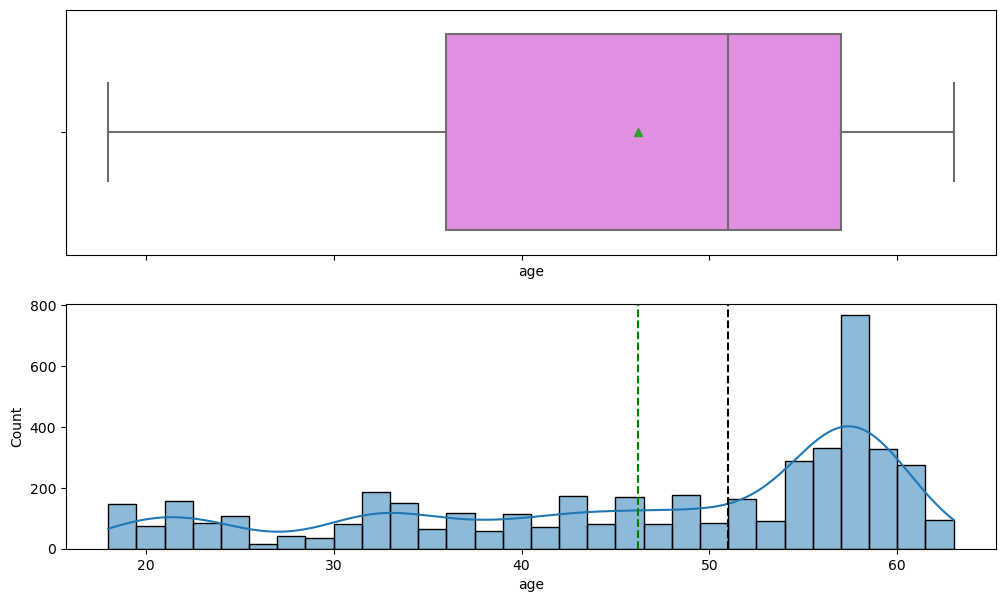

In [171]:
histogram_boxplot(data, "age", bins = 30)

**Observations:**
* The mean value is less than the median 
* The median is less than the mode
* This makes the distribution left skewed
* The color green is the mean, which is around 47.
* The small green triangle on the box plot is the mean too
* This shows that our average age is 47
* The black --- is the median. Our median is around 51 years
* There's a single x axis because we said: sharex=True meaning they should share the x axis
* The distribution seems normally distributed 
* Our median is at the far right - seems most of the ages are less then 51
* There are no outliers

#### **2.Website visits**

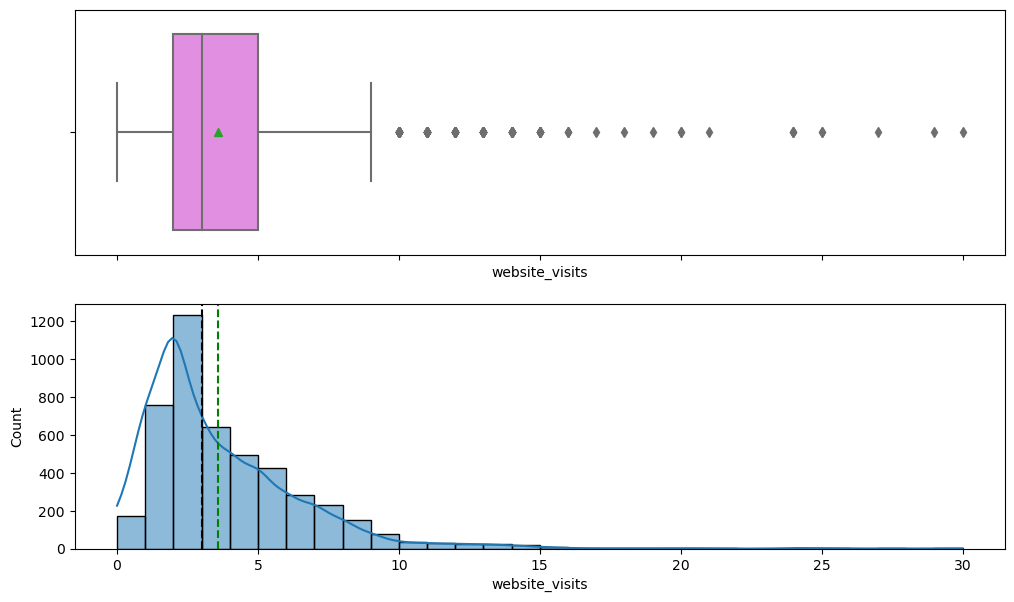

In [172]:
histogram_boxplot(data, "website_visits", bins = 30)

**Observations:**
* The color green is the mean - The small green triangle on the box plot is the mean too
* The black --- is the median. *
* when the mean is more than the median which is more than the mode (the most frequent)..This become right skewed 
* The average number of times a lead has visited the website is 4 times, whilst the median is 3 times
* The median and mean values are close to each other
* Very few people visit it more that 10 times. After 10 times those are now outliers
* The maximum is 
* The minimum is 0 times whilst the most to visit is 30 times, which is a very huge difference

#### **3.time spent on website**

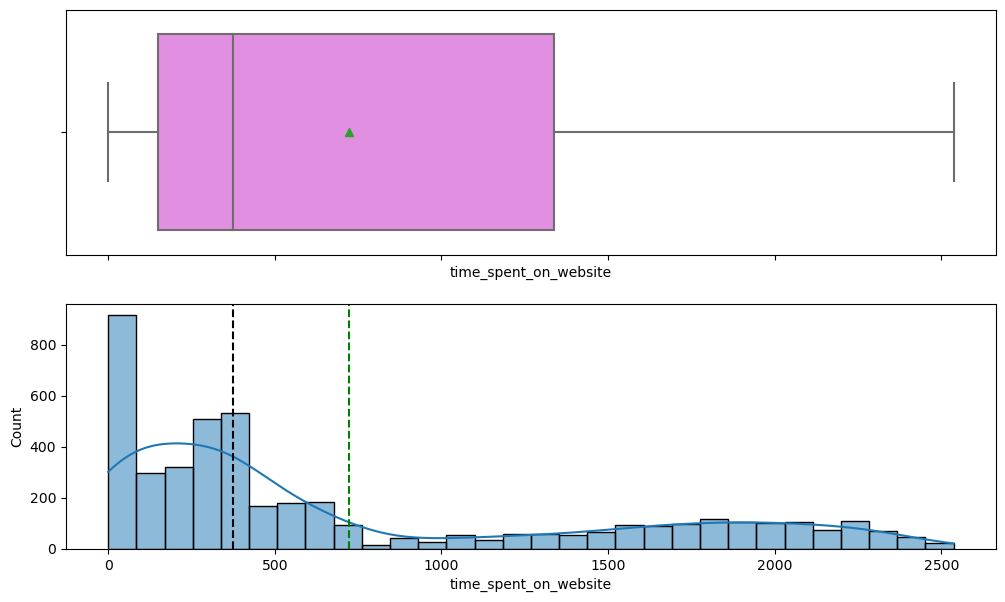

In [173]:
histogram_boxplot(data, "time_spent_on_website", bins = 30)

**Observations:**
* The color green is the mean - The small green triangle on the box plot is the mean too
* The black --- is the median. 
* The mean is greater than the median
* The median is greater than the mode
* The disbrution is skewed to the right
* Hence this distribution  is right 
* The average time spent on the website is around 724 secs which is about 12 minutes
* The most frequent number of seconds about 900 seconds (15 mins )
* The biggest time spent on the website is 2500 secs (41 mins)

#### **4.Distribution for page views per visit**

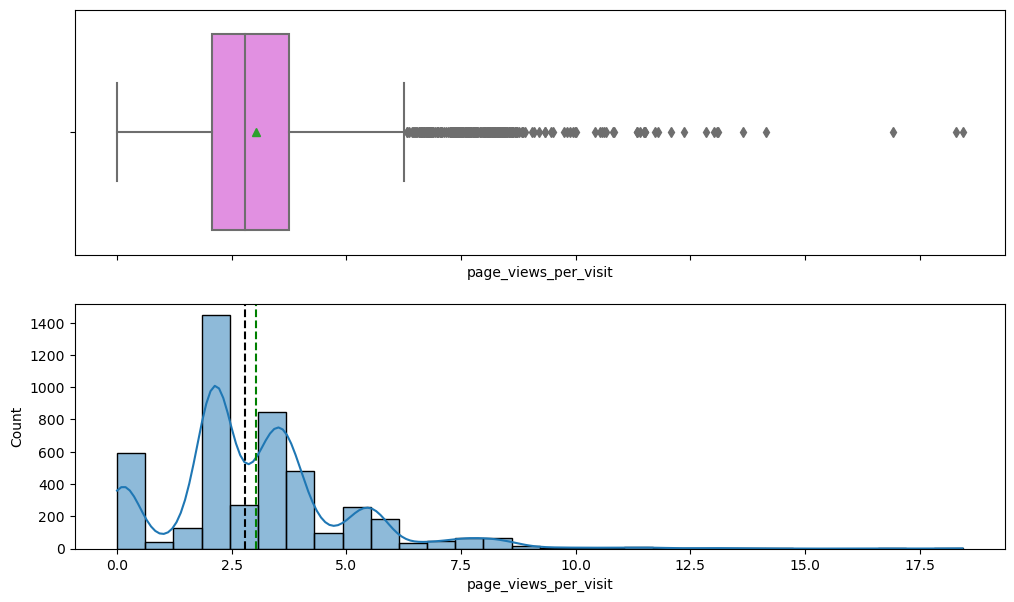

In [174]:
histogram_boxplot(data, "page_views_per_visit", bins = 30)

**Observations:**
* The color green is the mean, which is around 47.
* mode is the peak of the distribution
* The small green triangle on the box plot is the mean too
* This shows that our average age is 47
* The black --- is the median. Our median is around 51 years
* The mean is slightly greater than the median
* The median is greater than the mode
* when the mean is more than the median which is more than the mode (the most frequent)..This become right skewed 
* The mean and mode are close to each other
* The average page views per visit is around 3 pages
* Most maximum number of pages visited is 18
* We have outliers which start from 6 page views per visit, which means there are very few people that exceed 6 pages per visit

## **Bivariate Analysis**

In [175]:
data = data.select_dtypes(exclude=[object])

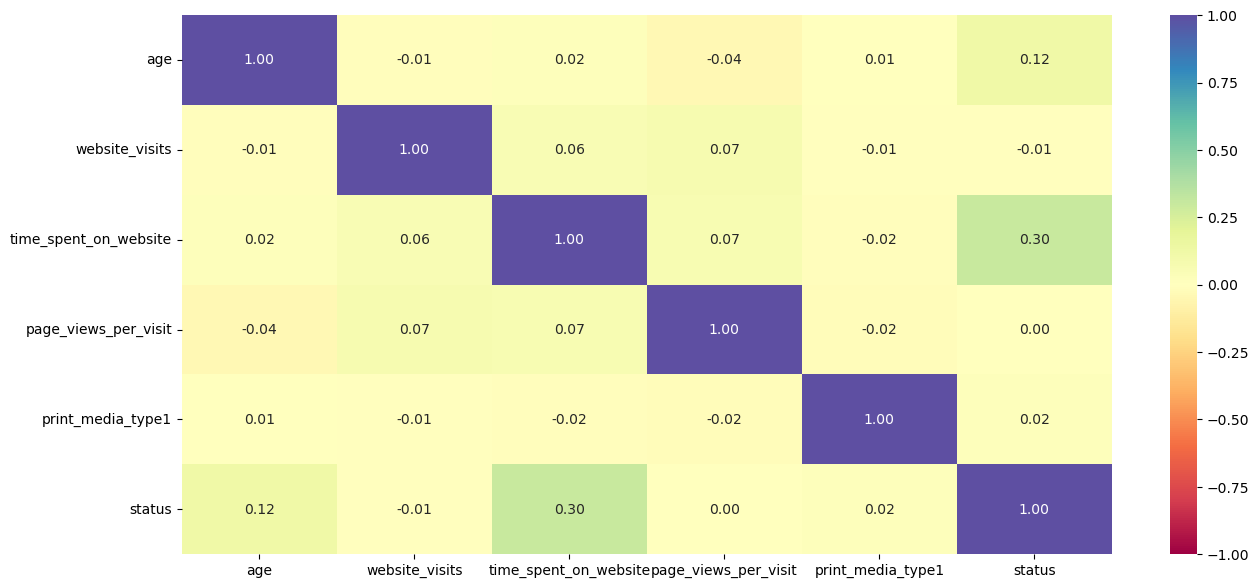

In [176]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Obervations**
* website visits have a negative correlation with status
* There is a negavtive correlation between page views per visit and status
* There seem to be very small relations
* 1 is extreme correlation
* If you realise, every variable with itself has a perfect correlation
* Correlations start with -1 all the way to 1
* The highest corelation that we have is 0.3 followed by 0.12
* There is a 0.3 correlation between the status of a lead and time spent on website which is slightly below 0.5
* It seems that the more time you spend on the website, the likely it is that the lead will buy
* There is a 0.12 correlation between age and status

### **How current occupation affects lead status**

In [177]:
df = pd.read_csv("ExtraaLearn.csv")

In [178]:
data = df.copy()

In [179]:
data.drop(["ID"], axis=1, inplace=True)

Text(0, 0.5, 'Lead Percentage %')

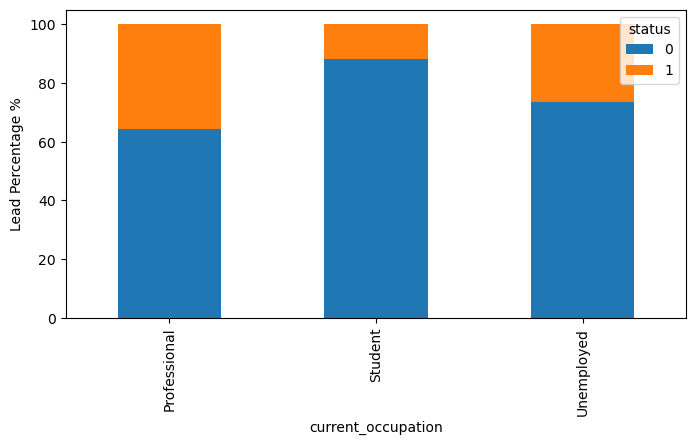

In [180]:
(pd.crosstab(data['current_occupation'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Lead Percentage %')

**observations**
Ocupation seems to play a key role in getting them to participate in the program
* most leads that end up buying are professionals, slightly followed by the unemployed

### **Checking if the first channels of interaction have an impact on the lead status** 

Text(0, 0.5, 'Lead Percentage %')

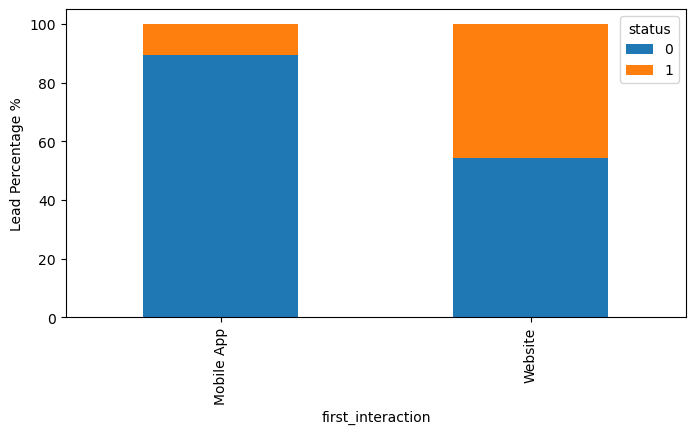

In [181]:
(pd.crosstab(data['first_interaction'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Lead Percentage %')

**Observations**
* Most leads that have their first interaction on the website converted to paying customers.
* There seems to be a huge difference on customers that buy after interacting with the website online compared to on Mobile App. There might be a need to find out why

**Separating the independent variables (X) and the dependent variable (Y)**

In [182]:
X = data.drop(["status"], axis=1)
y = data["status"]

### **Encoding categorical variables**

In [183]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [184]:
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
------------------------------
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64


In [185]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

current_occupation
Professional    1844
Unemployed       996
Student          388
Name: count, dtype: int64
******************************
first_interaction
Website       1770
Mobile App    1458
Name: count, dtype: int64
******************************
profile_completed
High      1580
Medium    1570
Low         78
Name: count, dtype: int64
******************************
last_activity
Email Activity      1581
Phone Activity       837
Website Activity     810
Name: count, dtype: int64
******************************
print_media_type1
No     2873
Yes     355
Name: count, dtype: int64
******************************
print_media_type2
No     3057
Yes     171
Name: count, dtype: int64
******************************
digital_media
No     2869
Yes     359
Name: count, dtype: int64
******************************
educational_channels
No     2722
Yes     506
Name: count, dtype: int64
******************************
referral
No     3167
Yes      61
Name: count, dtype: int64
****************************

In [186]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

current_occupation
Professional    1844
Unemployed       996
Student          388
Name: count, dtype: int64
******************************
first_interaction
Website       1770
Mobile App    1458
Name: count, dtype: int64
******************************
profile_completed
High      1580
Medium    1570
Low         78
Name: count, dtype: int64
******************************
last_activity
Email Activity      1581
Phone Activity       837
Website Activity     810
Name: count, dtype: int64
******************************
print_media_type1
No     2873
Yes     355
Name: count, dtype: int64
******************************
print_media_type2
No     3057
Yes     171
Name: count, dtype: int64
******************************
digital_media
No     2869
Yes     359
Name: count, dtype: int64
******************************
educational_channels
No     2722
Yes     506
Name: count, dtype: int64
******************************
referral
No     3167
Yes      61
Name: count, dtype: int64
****************************

In [187]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [188]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [189]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
389,57,1,582,2.19700,False,False,False,False,False,False,False,False,False,False,True,False
1162,35,2,1937,5.11100,False,True,True,False,True,False,False,False,False,True,False,False
1057,53,5,1554,2.12300,False,True,True,False,True,False,False,False,False,False,True,False
436,52,7,15,4.38200,False,False,True,False,False,False,False,False,False,False,False,False
946,57,0,0,0.00000,False,False,True,False,False,False,False,True,False,False,False,False


For each of the columns, we do not have any null value

In [190]:
# Creating metric function 
import matplotlib.pyplot as plt
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not likely to convert', 'Likely to convert Lead'], yticklabels=['Not likely to convert', 'Likely to convert Lead'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [191]:
#create a list of categorial columns in our dataset. Went to see by each column
#cat_col = [ 'current_occupation', 'first_interaction','profile_completed', 'website_visits','time_spent_on_website','page_views_per_visit','last_activity', 'status']
 # how many unqie values to we have and whats the unique count/frequency
""" for column in cat_col:
 print(df[column].value_counts(1))
 print('-'*50) """

" for column in cat_col:\n print(df[column].value_counts(1))\n print('-'*50) "

Correlation Tables

In [192]:
# let's look at the dataframe again
#df.head(2)

In [193]:

#df = df.select_dtypes(exclude=[object])

In [194]:
# we want extreme values to have different colors, so we will use a heatmap. This will give us some colors and present it as a figure
#sns.heatmap(df.corr(),annot = True,cmap = 'Spectral',vmin=-1,vmax=1)

**Categorical Variables**

In [195]:
#df = pd.read_csv("ExtraaLearn.csv")

In [196]:
#df.describe().T

In [197]:
""" def stacked_barplot(data,predictor,target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor],data[target]).sort_values(by=sorter,ascending=False)
    print(tab1) """

' def stacked_barplot(data,predictor,target):\n    count = data[predictor].nunique()\n    sorter = data[target].value_counts().index[-1]\n    tab1 = pd.crosstab(data[predictor],data[target]).sort_values(by=sorter,ascending=False)\n    print(tab1) '

In [198]:
#stacked_barplot(df,'current_occupation','first_interaction')

* The highest number of people who have interacted with ExtraaLearn are professionals. Probably because  professionals are always online
* The most used platform as a first interaction was through website, though Mobile App is also coming in closely
* Very few students have come across ExtraaLearn

In [199]:
# Do the first channels of interaction have an impact on the lead status?
#sns.barplot(x = "status", y = "first_interaction", data=df)
# Those whose fist interaction is the website are most likely to buy than those using mobile app
# On average the person who is likel to buy first interacted with the website
# There is a significance difference that shows between the two


In [200]:
#data.corr()

In [201]:
#df.head(2)

In [202]:
pd.get_dummies(df,
               columns=df.select_dtypes(include=['object','category']).columns.tolist(),
               drop_first=True
               )

age  website_visits  time_spent_on_website  page_views_per_visit  \
0      57               7                   1639               1.86100   
1      56               2                     83               0.32000   
2      52               3                    330               0.07400   
3      53               4                    464               2.05700   
4      23               4                    600              16.91400   
...   ...             ...                    ...                   ...   
4607   35              15                    360               2.17000   
4608   55               8                   2327               5.39300   
4609   58               2                    212               2.69200   
4610   57               1                    154               3.87900   
4611   55               4                   2290               2.07500   

      status  ID_EXT002  ID_EXT003  ID_EXT004  ID_EXT005  ID_EXT006  \
0          1      False      False      False      False      False   
1          0       True      False      False      False      False   
2          0      False       True      False      False      False   
3          1      False      False       True      False      False   
4          0      False      False      False       True      False   
...      ...        ...        ...        ...        ...        ...   
4607       0      False      False      False      False      False   
4608       0      False      False      False      False      False   
4609       1      False      False      False      False      False   
4610       0      False      False      False      False      False   
4611       0      False      False      False      False      False   

      ID_EXT007  ID_EXT008  ID_EXT009  ID_EXT010  ID_EXT011  ID_EXT012  \
0         False      False      False      False      False      False   
1         False      False      False      False      False      False   
2         False      False      False      False      False      False   
3         False      False      False      False      False      False   
4         False      False      False      False      False      False   
...         ...        ...        ...        ...        ...        ...   
4607      False      False      False      False      False      False   
4608      False      False      False      False      False      False   
4609      False      False      False      False      False      False   
4610      False      False      False      False      False      False   
4611      False      False      False      False      False      False   

      ID_EXT013  ID_EXT014  ID_EXT015  ID_EXT016  ID_EXT017  ID_EXT018  \
0         False      False      False      False      False      False   
1         False      False      False      False      False      False   
2         False      False      False      False      False      False   
3         False      False      False      False      False      False   
4         False      False      False      False      False      False   
...         ...        ...        ...        ...        ...        ...   
4607      False      False      False      False      False      False   
4608      False      False      False      False      False      False   
4609      False      False      False      False      False      False   
4610      False      False      False      False      False      False   
4611      False      False      False      False      False      False   

      ID_EXT019  ID_EXT020  ID_EXT021  ID_EXT022  ID_EXT023  ID_EXT024  \
0         False      False      False      False      False      False   
1         False      False      False      False      False      False   
2         False      False      False      False      False      False   
3         False      False      False      False      False      False   
4         False      False      False      False      False      False   
...         ...        ...        ...     

In [203]:
x= df.drop('status',axis = 1)
y = df['status']

In [204]:
y.shape

(4612,)

In [205]:
train_test_split(x,y, test_size=0.2)

[           ID  age current_occupation first_interaction profile_completed  \
 279    EXT280   21            Student           Website            Medium   
 4426  EXT4427   43         Unemployed           Website              High   
 1799  EXT1800   20            Student           Website              High   
 3533  EXT3534   57       Professional        Mobile App            Medium   
 3501  EXT3502   63         Unemployed           Website            Medium   
 ...       ...  ...                ...               ...               ...   
 1894  EXT1895   33       Professional           Website            Medium   
 54     EXT055   28       Professional        Mobile App              High   
 4535  EXT4536   61         Unemployed           Website              High   
 677    EXT678   60         Unemployed        Mobile App              High   
 1809  EXT1810   56       Professional        Mobile App              High   
 
       website_visits  time_spent_on_website  page_views_per_v

## Building a Decision Tree model

In [206]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
# we do not want the tree to grow more than eight levels
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



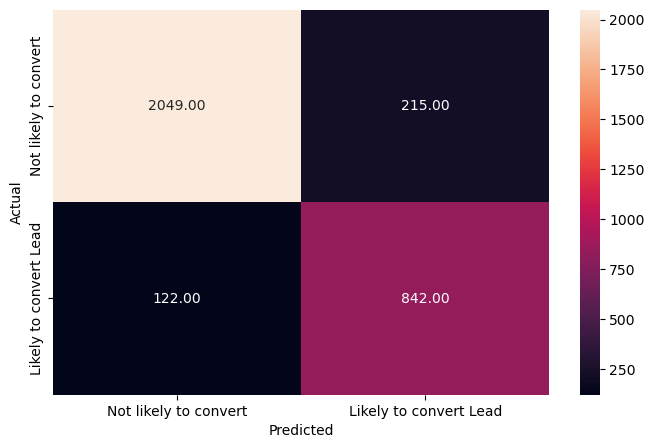

In [207]:
#Precision recall
pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



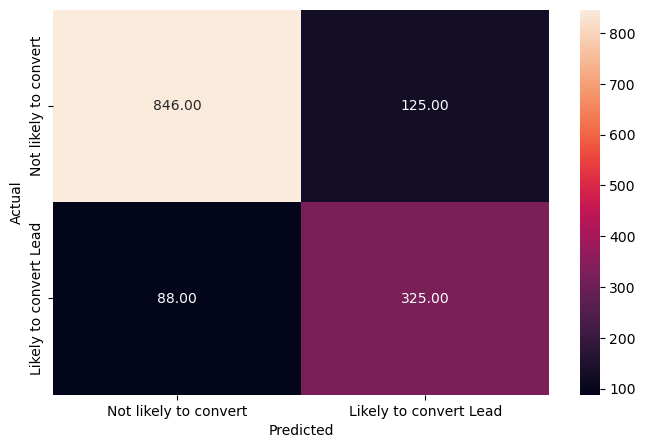

In [208]:
# looking at our test set
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**observations**
* The decision model is slighlty overfitting 

## Do we need to prune the tree?

* We need to prune the tree to reduce overfitting and increase performance
* The model is fitting the training data very well, but it won't perform well on the test data because of overfiiting

In [209]:
# yes we need to
#Precision recall
model_dt= DecisionTreeClassifier(random_state=1,max_depth=6)
# we do not want the tree to grow more than eight levels
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2264
           1       0.78      0.79      0.79       964

    accuracy                           0.87      3228
   macro avg       0.84      0.85      0.85      3228
weighted avg       0.87      0.87      0.87      3228



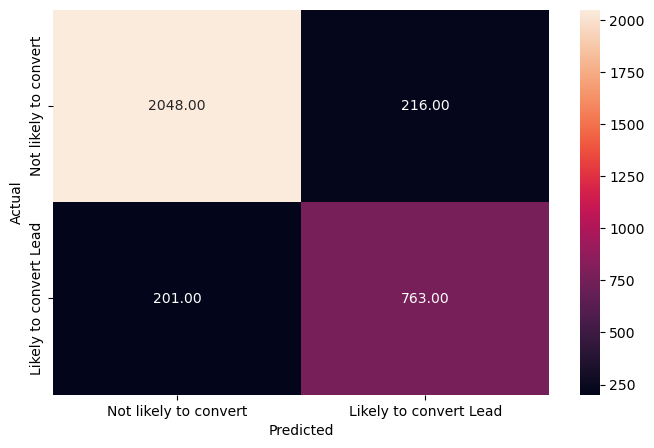

In [210]:
pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       971
           1       0.76      0.75      0.75       413

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.85      0.85      0.85      1384



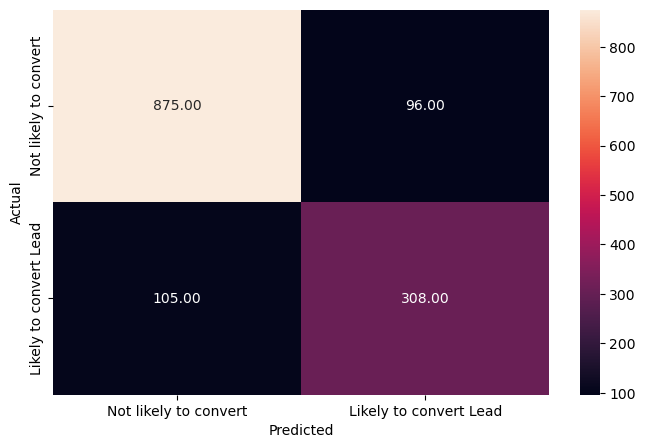

In [211]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations